In [1]:
import numpy as np, cv2 as cv, math
from scipy.special import factorial
from matplotlib import pyplot as plt
from Profiler import *

line = "*"*60
line2 = "\n" + "*"*60 + "\n"

print( f"Hello... Good morning!" )
print( f"Importing was done." )

Hello... Good morning!
Importing was done.


In [2]:
@profile
def Rpq(p, q, rho, debug = 0 ) :
    if abs(q) > p : 
        print( f"Invalid argument, abs(q = {q}) < p(={p}) is not satisfied")
        return 
    pass

    if int(p - abs(q))%2 == 1 : 
        print( f"Invalid argument, p({p}) - q({q}) should be an even number.")
        return 
    pass 

    q = abs( q )

    t = max( (p - q)/2, 0 )
    s = np.arange( 0, t + 1 )
    
    R_ps = np.power( -1, s )*factorial(p - s)/factorial(s)/factorial( (p + q)/2 - s)/factorial( (p - q)/2 - s )
    rho_power = []
    
    for p_2s in p - 2*s :
        rho_power.append( np.power(rho, p_2s ) )
    pass

    rho_power = np.array( rho_power )
    
    R_pq_rho = np.inner( rho_power.T, R_ps )
    
    #R_sum = np.sum( R_pq_rho )
        
    if debug : 
        print( line2 )
        print( f"p = {p}, q={q}, (p - |q|)/2 = {t}" )
        print( "s = ", s )
        print( "R_ps = ", R_ps )
        print( "rho_power shape = ", rho_power.shape )
        print( "rho_power.T shape = ", rho_power.T.shape )
        print( "rho_power = ", rho_power )
        print( "rho_power.T = ", rho_power.T )
        print( "R_pq_rho = ", R_pq_rho )    
        #print( "R_sum = ", R_sum )
        print( line2 )
    pass
    
    return R_pq_rho
pass

@profile
def Vpq( p, q, x, y, debug = 0 ) :
    rho = np.sqrt( x**2 + y**2 )
    
    R_pq = Rpq( p, q, rho, debug = 0 )
    
    V_pq = R_pq 
    
    if q : 
        V_pq = R_pq*np.exp( 1j*q*np.arctan2( y, x ) );
    pass    
    
    #print( "rho = ", rho )
    if debug : 
        print( f"V_pq({p}, {q}) = ", V_pq )
    pass

    return V_pq
pass

print( "Zernike functions are defined.")

from datetime import datetime
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Zernike functions are defined.
Current Time = 00:43:31


Plots of Radial Poolynomial


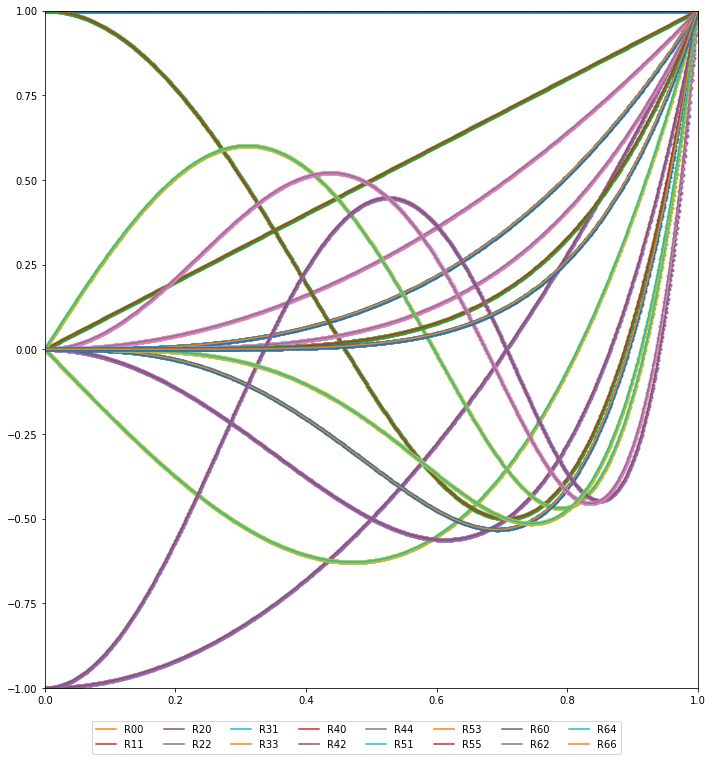

rho = [0.    0.001 0.002 ... 0.998 0.999 1.   ]
Done.


In [35]:
print( "Plots of Radial Poolynomial" )

debug = 0

datas = []
datas.append( { "order" : (0, 0), "coeffs" : [1] })
datas.append( { "order" : (1, 1), "coeffs" : [1] })
datas.append( { "order" : (2, 0), "coeffs" : [1, -1] })
datas.append( { "order" : (2, 2), "coeffs" : [1] })

datas.append( { "order" : (3, 1), "coeffs" : [3, -2] })
datas.append( { "order" : (3, 3), "coeffs" : [1] })

datas.append( { "order" : (4, 0), "coeffs" : [6, -6, 1] })
datas.append( { "order" : (4, 2), "coeffs" : [4, -3] })
datas.append( { "order" : (4, 4), "coeffs" : [1] })

datas.append( { "order" : (5, 1), "coeffs" : [10, -12, 3] })
datas.append( { "order" : (5, 3), "coeffs" : [5, -4] })
datas.append( { "order" : (5, 5), "coeffs" : [1] })

datas.append( { "order" : (6, 0), "coeffs" : [20, -30, 12, -1] })
datas.append( { "order" : (6, 2), "coeffs" : [15, -20, 6] })
datas.append( { "order" : (6, 4), "coeffs" : [6, -5] })
datas.append( { "order" : (6, 6), "coeffs" : [1] })

fig, charts = plt.subplots( 1, 1, figsize=(10, 10) )
chart = charts

step = 1/1_000
rho = np.arange( 0, 1 + step, step ) 
    
for data in datas : 
    order  = data[ "order" ]
    coeffs = data[ "coeffs" ]
    p = order[0] ; q = order[1]
    r_pl_numeric = Rpq( p, q, rho, debug )
    
    r_pl_analytic = np.zeros_like( rho )
    for idx, coeff in enumerate( coeffs ) : 
        r_pl_analytic += coeff*np.power( rho, p - 2*idx )
    pass
    
    chart.plot( rho, r_pl_numeric, ".--" )
    chart.plot( rho, r_pl_numeric, label=f"R{p}{q}", linestyle="solid" )
pass

chart.set_xlim(  0, 1 )
chart.set_ylim( -1, 1 )
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0), fancybox=True, shadow=0, ncol=len(datas)//2)
plt.tight_layout(); plt.show()
print( f"rho = {rho}" )

print( "Done.")

In [4]:
print( "Radial polynomail orthogonality validation" )

step = 1/1_000

rho = np.arange( 0, 1 + step, step ) 
print( f"rho = {rho}" )

debug = 0
T = 5 
for p in range( 0, T + 1 ) :
    for q in range( 0, T + 1 ) :
        for l in range( -q, q + 1 ) :
            if abs(l) > p or abs(l) > q:
                continue ;
            elif   ( p - abs(l) )%2 == 1 :
                continue
            elif ( q - abs(l) )%2 == 1 :
                continue
            pass
        
            r_pl = Rpq( p, l, rho, debug )
            r_ql = Rpq( q, l, rho, debug )
            
            sum = 0 
            sum = np.sum(r_pl*r_ql*rho*step)*2*(p + 1)
            
            print( f"Rpl({p}, {l:2d})*Rql({q}, {l:2d}) = {sum}" )
        pass
    pass
pass

print( "Done")

Radial polynomail orthogonality validation
rho = [0.    0.001 0.002 ... 0.998 0.999 1.   ]
Rpl(0,  0)*Rql(0,  0) = 1.0010000000000001
Rpl(0,  0)*Rql(2,  0) = 0.0010010000000000574
Rpl(0,  0)*Rql(4,  0) = 0.0010019999990000111
Rpl(1, -1)*Rql(1, -1) = 1.0020010000000001
Rpl(1,  1)*Rql(1,  1) = 1.0020010000000001
Rpl(1, -1)*Rql(3, -1) = 0.0020029999990000547
Rpl(1,  1)*Rql(3,  1) = 0.0020029999990000547
Rpl(1, -1)*Rql(5, -1) = 0.0020063333256667842
Rpl(1,  1)*Rql(5,  1) = 0.0020063333256667842
Rpl(2,  0)*Rql(0,  0) = 0.003003000000000172
Rpl(2, -2)*Rql(2, -2) = 1.0030024999995
Rpl(2,  0)*Rql(2,  0) = 1.003003999998
Rpl(2,  2)*Rql(2,  2) = 1.0030024999995
Rpl(2, -2)*Rql(4, -2) = 0.003006499994500124
Rpl(2,  0)*Rql(4,  0) = 0.003008999988000069
Rpl(2,  2)*Rql(4,  2) = 0.003006499994500124
Rpl(3, -1)*Rql(1, -1) = 0.004005999998000109
Rpl(3,  1)*Rql(1,  1) = 0.004005999998000109
Rpl(3, -3)*Rql(3, -3) = 1.0040046666643334
Rpl(3, -1)*Rql(3, -1) = 1.004009999987
Rpl(3,  1)*Rql(3,  1) = 1.0040099

2021-11-29:00:43:32, INFO     [Profiler.py:0085] *** The function[ Rpq ] Average: 0.000 sec(s), Max: 0.006 sec(s), Call : 105 times. 
2021-11-29:00:43:32, INFO     [Profiler.py:0085] *** The function[ Vpq ] Average: 0.000 sec(s), Max: 0.001 sec(s), Call : 10 times. 


img shape=  (3, 3)
K = 3, H = 8, W = 8, r = 5.656854249492381
x =  [0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 6 6 6 7 7 7 7
 7 7 8 8 8 8 8 8]
y =  [0 1 2 6 7 8 0 1 2 6 7 8 0 1 2 6 7 8 3 4 5 3 4 5 3 4 5 3 4 5 6 7 8 3 4 5 6
 7 8 3 4 5 6 7 8]
T = 3
V^_pq*V_pq(3, -3) =  (7.625424061901846+0j)
V^_pq*V_pq(3, -1) =  (7.625424061901846+0j)
V^_pq*V_pq(3, 1) =  (7.625424061901846+0j)
V^_pq*V_pq(3, 3) =  (7.625424061901846+0j)
V^_pq*V_pq(2, -2) =  (7.625424061901846+0j)
V^_pq*V_pq(2, 0) =  (7.625424061901846+0j)
V^_pq*V_pq(2, 2) =  (7.625424061901846+0j)
V^_pq*V_pq(1, -1) =  (7.625424061901846+0j)
V^_pq*V_pq(1, 1) =  (7.625424061901846+0j)
V^_pq*V_pq(0, 0) =  (7.625424061901846+0j)


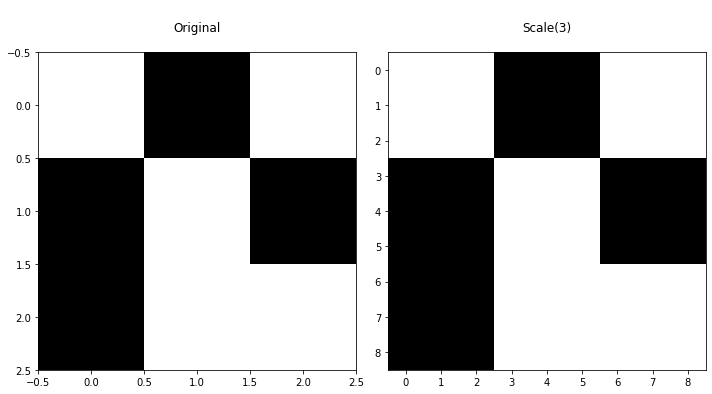

In [5]:


img = cv.imread( 'image/lenna.png', 0 )

shape = img.shape
width = 100
if shape[0] > shape[1] :
    img = cv.resize( img, (width, shape[0]*width//shape[1]) )
else :
    img = cv.resize( img, (shape[1]*width//shape[0], width) )
pass

img = np.array( [ [1, 0, 1], [0, 1, 0 ], [0, 1, 1] ], np.uint8 )

shape = img.shape
print( "img shape= ", shape )

img_org = img 

k = 3
img = cv.resize( img_org, (img_org.shape[1]*k, img_org.shape[0]*k), interpolation=cv.INTER_AREA )

h = img.shape[0] - 1
w = img.shape[1] - 1
mwh = max( h/2, w/2 )
r = math.sqrt( 2*mwh*mwh )
print( f"K = {k}, H = {h}, W = {w}, r = {r}" )
x, y = np.where( img > 0 )

if 1 : 
    print( "x = ", x[:] )
    print( "y = ", y[:] )
pass

x = (x - mwh)/r
y = (y - mwh)/r

if 0 : 
    print( "x = ", x[:] )
    print( "y = ", y[:] )
pass

T = 3
print( f"T = {T}" )
for p in range( T, -1, -1 ) : 
    for q in range( -p, p + 1 ) :
        if (p - abs(q))%2 == 0 : #짝수일 경우에만
            v_pq = Vpq( 6, 2, x, y )
            test = np.sum( v_pq*np.conjugate(v_pq) )
            #print( f"V_pq({p}, {q}) = ", v_pq )
            print( f"V^_pq*V_pq({p}, {q}) = ", test )
        pass
    pass
pass

# 서브 챠트 생성 
idx = 0 
fig, charts = plt.subplots( 1, 2, figsize=(10, 10) )
charts = charts.flatten()
chart = charts[ idx ] ; idx += 1
chart.set_title( "\nOriginal\n" )
chart.imshow( img_org, cmap='gray' )

chart = charts[ idx ] ; idx += 1
chart.set_title( f"\nScale({k})\n" )
chart.imshow( img, cmap='gray' )

print_profile()

plt.tight_layout(); plt.show()